In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

The following describes the dataset variables:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000
* PTRATIO - pupil-teacher ratio by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

**the "Median value of owner-occupied homes" provide a boxplot**

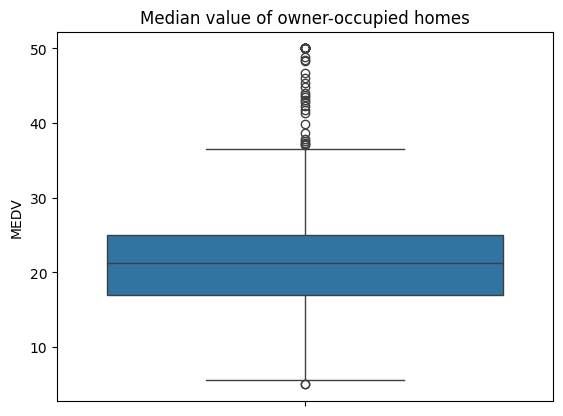

In [77]:
sns.boxplot(boston_df.MEDV)
pyplot.title('Median value of owner-occupied homes')
pyplot.show()

**a bar plot for the Charles river variable**

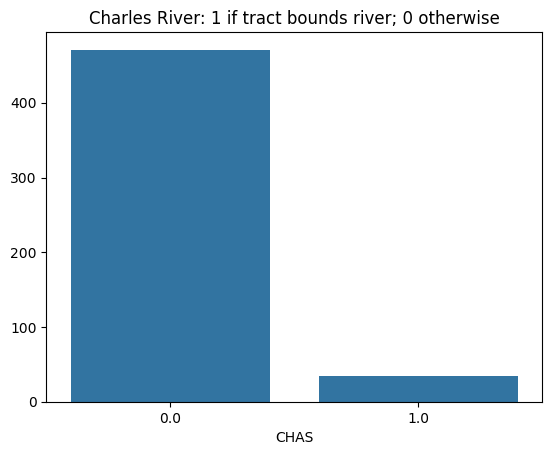

In [76]:
df = boston_df.groupby('CHAS').size()
sns.barplot(df)
pyplot.title('Charles River: 1 if tract bounds river; 0 otherwise')
pyplot.show()

 **a boxplot for the MEDV variable vs the AGE variable. 
(Discretize the age variable into three groups of 35 years and younger, 
 between 35 and 70 years and 
 70 years and older)**

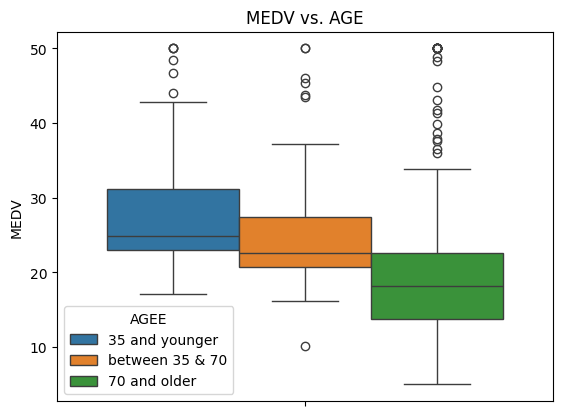

In [75]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGEE'] = '35 and younger'
boston_df.loc[((boston_df['AGE'] >35) & (boston_df['AGE'] <70)), 'AGEE'] = 'between 35 & 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGEE'] = '70 and older'

sns.boxplot(data = boston_df, y='MEDV', hue='AGEE', hue_order = ['35 and younger', 'between 35 & 70', '70 and older'])
pyplot.title('MEDV vs. AGE')
pyplot.show()

**a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

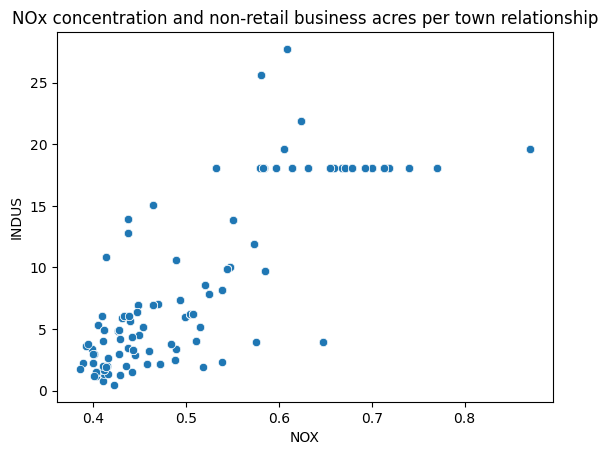

In [73]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('NOx concentration and non-retail business acres per town relationship')
pyplot.show()

**a histogram for the pupil to teacher ratio variable**

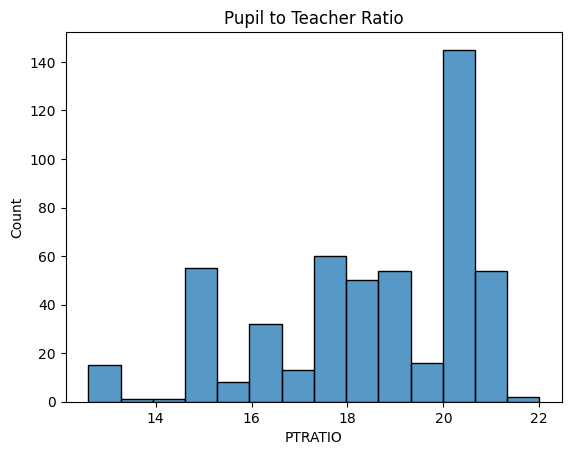

In [80]:
sns.histplot(boston_df.PTRATIO)
pyplot.title('Pupil to Teacher Ratio')
pyplot.show()

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

* H0: There is no statistical difference between the houses bounded by the Charles river with those that didn't
* H1: There is statistical difference between the houses bounded by the Charles river with those that didn't

In [84]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

*p_value is less than alpha value, so we will set the equal_var parameter of the ttest analysis to FALSE*

In [87]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

*P_value is less than the alpha = 0.05, so we reject the null hypothesis and result that there is significant difference between the houses prices which the Charles River bounded or doesn't*

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

* H0: There is no difference between the MEDV of houses for each AGE category
* H1: There is differences between the MEDV of houses for each AGE category

In [91]:
G_35 = boston_df[boston_df['AGEE'] == '35 and younger']['MEDV']
G_35_70 = boston_df[boston_df['AGEE'] == 'between 35 & 70']['MEDV']
G_70 = boston_df[boston_df['AGEE'] == '70 and older']['MEDV']
scipy.stats.levene(G_35, G_35_70, G_70, center = 'mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

*P_value is bigger than alpha, so we conclude that the variances are equal.*

In [92]:
scipy.stats.f_oneway(G_35, G_35_70, G_70)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

*P_value is less than alpha, so we reject the null hypothesis and conclude that there is significant statistical differences at least between one of the AGE categories and the others*

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

* H0: there is no relationship between NOx and INDUS variables
* H1: there is a relationship between NOx and INDUS variables

In [94]:
scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Based on the test results, the p-value is less than alpha and we can reject the null hypothesis and conclude that there is a statistical relationship betwenn NOx and INDUS variable

**What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

* H0: There is no correlation between additional weighted distance to the centers and MEDV
* H1: There is a correlation between additional weighted distance to the centers and MEDV

In [97]:
x= boston_df['DIS']
y= boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predict = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        17:21:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P_value is less than alpha value, so we can bust the H0 hypothesis and conclude that there is a correlation between distance to the employment centers and the MEDV